# Requirements

In [27]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from scipy import stats
import sklearn.metrics       as Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

# Loading data

In [19]:
#df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
df_onehot = pd.read_csv("C:/Users/dielesro/Documents/Workstation/Debuggers/data/4rf_full_ok_encoded_bestVar.csv")
id_cli = df_onehot.iloc[-281666:,-1]
df_onehot = df_onehot.drop(['id_registro'], axis=1)
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,periodo,profesion_AUXILIAR DE ODONTOLOGIA,profesion_BACTERIOLOGIA,profesion_CARRERA MILITAR,profesion_COMERCIO INTERNACIONAL,gasto_familiar
0,1.0,2406953.0,779157.0,6,1,1,2,1,1.0,44,2,201902,0,0,0,0,3.663700e+05
1,1.0,3014036.0,0.0,6,1,1,3,1,1.0,44,2,202001,0,0,0,0,7.372630e+05
2,2.0,1242174.0,0.0,6,1,1,3,1,1.0,44,2,202009,0,0,0,0,4.473640e+05
3,1.0,2851369.0,741967.0,6,1,1,4,1,1.0,44,2,201908,0,0,0,0,4.797520e+05
4,1.0,3171369.0,0.0,6,1,1,3,1,1.0,44,2,201911,0,0,0,0,1.599610e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527188,2.0,3876343.0,2281362.0,6,1,1,8,1,1.0,44,1,202011,0,0,0,0,7.431714e+05
1527189,3.0,26913722.0,14956096.0,6,1,1,5,2,3.0,47,2,202011,0,0,1,0,8.502165e+05
1527190,3.0,16301000.0,0.0,8,1,1,3,2,3.0,46,1,202011,0,0,0,0,7.853290e+05
1527191,2.0,14481371.0,11916465.0,6,1,1,7,1,5.0,64,1,202011,0,0,0,0,1.029045e+06


mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

df = df[mejores_variables]
df

features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

df.iloc[8000000:-281666,:]

# One-Hot Encoding

df_onehot = pd.get_dummies(df.iloc[8000000:,:],
                           columns=features_o)
list(df_onehot.columns)

df_onehot

(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

### Best Variables

X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:16]

df = df_std[list(X['Variable'])[:16]]
df

top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'periodo',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_BACTERIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
                     'gasto_familiar']

df_onehot = df_onehot[top_PCA_Variables]
df_onehot

In [20]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,periodo,profesion_AUXILIAR DE ODONTOLOGIA,profesion_BACTERIOLOGIA,profesion_CARRERA MILITAR,profesion_COMERCIO INTERNACIONAL,gasto_familiar
0,1.0,2406953.0,779157.0,6,1,1,2,1,1.0,44,2,201902,0,0,0,0,3.663700e+05
1,1.0,3014036.0,0.0,6,1,1,3,1,1.0,44,2,202001,0,0,0,0,7.372630e+05
2,2.0,1242174.0,0.0,6,1,1,3,1,1.0,44,2,202009,0,0,0,0,4.473640e+05
3,1.0,2851369.0,741967.0,6,1,1,4,1,1.0,44,2,201908,0,0,0,0,4.797520e+05
4,1.0,3171369.0,0.0,6,1,1,3,1,1.0,44,2,201911,0,0,0,0,1.599610e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527188,2.0,3876343.0,2281362.0,6,1,1,8,1,1.0,44,1,202011,0,0,0,0,7.431714e+05
1527189,3.0,26913722.0,14956096.0,6,1,1,5,2,3.0,47,2,202011,0,0,1,0,8.502165e+05
1527190,3.0,16301000.0,0.0,8,1,1,3,2,3.0,46,1,202011,0,0,0,0,7.853290e+05
1527191,2.0,14481371.0,11916465.0,6,1,1,7,1,5.0,64,1,202011,0,0,0,0,1.029045e+06


## Normalization

In [21]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,1527193.0,0.31,0.14,0.0,0.20,0.20,0.40,1.0
1,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
2,1527193.0,0.00,0.01,0.0,0.00,0.00,0.01,1.0
3,1527193.0,0.54,0.17,0.0,0.56,0.56,0.56,1.0
4,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,1527193.0,0.61,0.36,0.0,0.29,0.71,1.00,1.0
7,1527193.0,0.49,0.50,0.0,0.00,0.00,1.00,1.0
8,1527193.0,0.46,0.46,0.0,0.00,0.50,1.00,1.0
9,1527193.0,0.58,0.21,0.0,0.55,0.55,0.69,1.0


In [22]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [23]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 16)
(281666,)
(1245527,)


### Train/test Sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1152976,0.2,0.000271,0.000000,0.555556,0.0,0.0,0.857143,1.0,0.00,0.551282,0.071429,0.045872,0.0,0.0,0.0,0.0
406402,0.2,0.000240,0.004818,0.555556,0.0,0.0,0.857143,1.0,0.00,0.551282,0.142857,0.055046,0.0,0.0,0.0,0.0
508397,0.2,0.000130,0.001959,0.555556,0.0,0.0,0.857143,1.0,1.00,0.551282,0.071429,0.908257,0.0,0.0,0.0,0.0
354394,0.4,0.000165,0.003011,0.555556,0.0,0.0,0.857143,1.0,0.75,0.487179,0.071429,0.990826,0.0,0.0,0.0,0.0
322905,0.2,0.000394,0.003772,0.555556,0.0,0.0,0.142857,1.0,1.00,0.666667,0.071429,0.990826,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996559,0.6,0.001619,0.011704,0.555556,0.0,0.0,1.000000,1.0,1.00,0.807692,0.142857,0.027523,0.0,0.0,0.0,0.0
248587,0.2,0.000549,0.017739,0.000000,0.0,0.0,0.000000,0.0,0.75,0.551282,0.071429,0.009174,0.0,0.0,0.0,0.0
932765,0.2,0.000323,0.000000,0.555556,0.0,0.0,0.000000,1.0,0.75,0.423077,0.071429,0.018349,0.0,0.0,0.0,0.0
696886,0.2,0.000832,0.013319,0.555556,0.0,0.0,0.857143,1.0,0.00,0.653846,0.071429,0.000000,0.0,0.0,0.0,0.0


# Default ~ _RandomForest_

In [28]:
rfr0 = RandomForestRegressor(n_jobs=-1, random_state=42)
rfr0.fit(X_train,y_train)
y_hat_rf0=rfr0.predict(X_test)#[::,1]
mean_absolute_error(y_test, y_hat_rf0)

0.001041903279061446

In [33]:
mape0 = sum((y_test-y_hat_rf0).abs()
                 .div(y_test)
                 /len(y_hat_rf0)
             )

mape0

0.054819039064256184

# Grid Search ~ _RandomForest_

In [34]:
rfr1 = RandomForestRegressor(n_jobs=-1,random_state=42)

In [39]:
param_grid = { 
    #'n_estimators': [200, 500, 1000],
    #'max_features': ['sqrt', 'log2'],
    #'max_depth' : [5,10,20,30],
    'criterion' :['mse', 'mae']
}

In [38]:
CV_rfr = GridSearchCV(estimator=rfr1, param_grid=param_grid, cv= 5)
CV_rfr.fit(X_train, y_train)

KeyError: 'gini'

In [ ]:
CV_rfr.best_params_

In [ ]:
rfr1=RandomForestRegressor(**CV_rfr.best_params_)
rfr1.fit(X_train, y_train)

In [21]:
y_hat_rf1 = rfr1.predict(X_test)

In [22]:
print("mae for Random Forest 1 on CV data: ",mean_absolute_error(y_test,y_hat_rf1))

Accuracy for Random Forest on CV data:  0.8523145233440472


In [ ]:
mape1 = sum((y_test-y_hat_rf1).abs()
                 .div(y_test)
                 /len(y_hat_rf1)
             )

mape1

# 2nd Grid Search ~ _RandomForest_

In [25]:
rfr2 = RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            criterion='entropy')

In [26]:
param_grid = { 
    #'n_estimators': [200, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    #'max_depth' : [5,10,20,30],
    #'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfr = GridSearchCV(estimator=rfr2, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [27]:
CV_rfr.best_params_

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', n_jobs=-1,
                                              random_state=42),
             param_grid={'max_depth': [20, 25, 30, 35],
                         'n_estimators': [500, 750, 1000, 1250]})

In [30]:
rfr2=RandomForestRegressor(**CV_rfr.best_params_)
rfr2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=35, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [31]:
y_hat_rf2 = rfr2.predict(X_test)

In [32]:
print("mae for Random Forest 2 on CV data: ",mean_absolute_error(y_test,y_hat_rf2))

Accuracy for Random Forest on CV data:  0.8578481725703304


In [ ]:
mape2 = sum((y_test-y_hat_rf2).abs()
                 .div(y_test)
                 /len(y_hat_rf2)
             )

mape2

# 3rd Grid Search ~ RandomForest

In [ ]:
rfr3 = RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            criterion='entropy',
                            max_features = 'sqrt')

In [ ]:
param_grid = { 
    'n_estimators': range(0, 200, 25),
    #'max_features': ['sqrt', 'log2'],
    #'max_depth' : [5,10,20,30],
    #'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfr = GridSearchCV(estimator=rfr3, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfr.best_params_

In [ ]:
rfr3=RandomForestRegressor(**CV_rfr.best_params_)
rfr3.fit(X_train, y_train)

In [ ]:
y_hat_rf3 = rfr3.predict(X_test)

In [ ]:
print("mae for Random Forest 3 on CV data: ",mean_absolute_error(y_test,y_hat_rf3))

In [ ]:
mape3 = sum((y_test-y_hat_rf3).abs()
                 .div(y_test)
                 /len(y_hat_rf3)
             )

mape3

## 4th Grid Search ~ RandomForest

In [ ]:
rfr3 = RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            criterion='entropy',
                            max_features = 'sqrt'
                            n_estimators = 0 )

In [ ]:
param_grid = { 
    #'n_estimators': range(0, 200, 25),
    #'max_features': ['sqrt', 'log2'],
    'max_depth' : range(0, 100, 20),
    #'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfr = GridSearchCV(estimator=rfr3, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfr.best_params_

In [ ]:
rfr4=RandomForestRegressor(**CV_rfr.best_params_)
rfr4.fit(X_train, y_train)

In [ ]:
y_hat_rf4 = rfr4.predict(X_test)

In [ ]:
print("mae for Random Forest 4 on CV data: ",mean_absolute_error(y_test,y_hat_rf4))

In [ ]:
mape4 = sum((y_test-y_hat_rf4).abs()
                 .div(y_test)
                 /len(y_hat_rf4)
             )

mape4

## Assessment

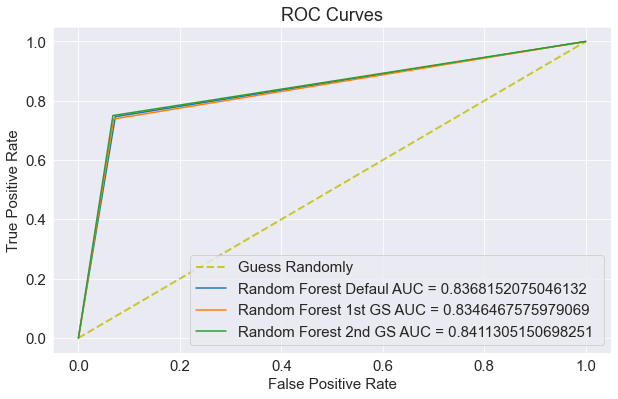

In [35]:
model_names={'Random Forest Defaul':y_hat_rf0,
             'Random Forest 1st GS':y_hat_rf1,
             'Random Forest 2nd GS':y_hat_rf2,
             'Random Forest 3rd GS':y_hat_rf3
             'Random Forest 2nd GS':y_hat_rf4}

sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='y', label='Guess Randomly', alpha=.8)
for name in model_names:

    fpr, tpr, _ = Metrics.roc_curve(y_test, model_names[name])
    auc=Metrics.auc(fpr, tpr)
    
    # Display plot for ROC curve
    ax.plot(fpr,tpr,label=name+" AUC = %s " % str(auc))
    plt.legend(loc=4)
    plt.title("ROC Curves")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plt.show()

## MAPE

In [ ]:
mapes = [mape0,mape1,mape2,mape3,mape4]
mapes

In [ ]:
plt.figure(figsize=(13,6))
y = mapes
x = range(1,5)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Submission

In [ ]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hay
sub_normalized